## D. Mohammad Abdulla
## BL.EN.U4AIE21044
## AIE - D
## Lab - 7

### A1.Use HMM for classification of your speech signal using STFT features.

In [11]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

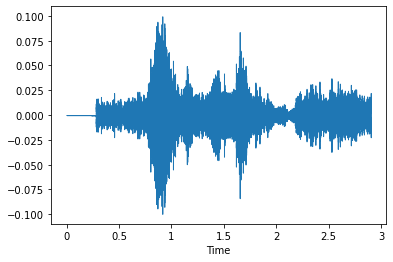

In [12]:
y, sr = librosa.load('Abdulla.mp3')
librosa.display.waveshow(y)

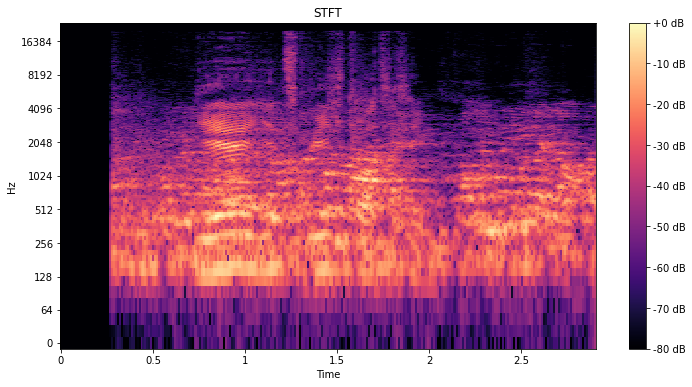

Model is not converging.  Current: 842825.9101706415 is not greater than 842825.91140181. Delta is -0.001231168513186276


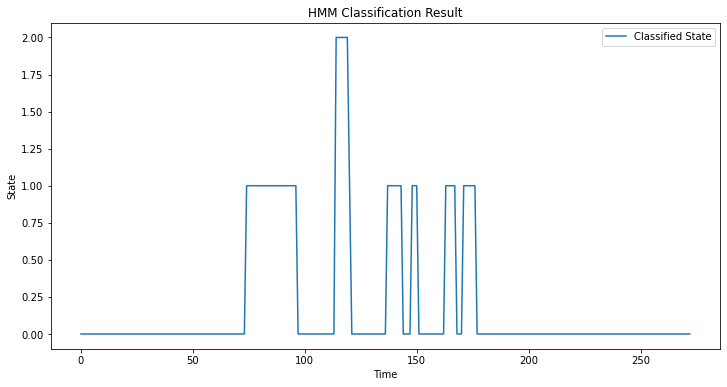

HMM Model Parameters:
Transition Matrix:
[[9.72850679e-001 2.26244344e-002 4.52488688e-003]
 [1.33333332e-001 8.66666668e-001 3.31376125e-114]
 [0.00000000e+000 1.66666667e-001 8.33333333e-001]]
Means:
[[1.35047497e-02 1.59286614e-02 2.44041160e-02 ... 8.90891556e-06
  8.95238768e-06 8.93336946e-06]
 [2.06250458e-02 2.73782920e-02 3.39079090e-02 ... 1.82762355e-06
  2.27067635e-06 2.30704570e-06]
 [1.80427729e-02 1.26666697e-02 2.15833640e-02 ... 1.05024518e-06
  1.11460417e-06 1.31707693e-06]]
Covariances:
[[[2.65152804e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.42180350e-04 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 4.09387195e-04 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.50547621e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   4.50547

In [22]:
def load_audio(file_name):
    y, sr = librosa.load(file_name, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_name = 'Abdulla.mp3'
    
    # Load audio
    y, sr = load_audio(audio_file_name)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
